## Q2

In [1]:
import numpy as np

# Given points (x1, x2, x3)
points = np.array([
    [0, 3],  # x1
    [3, 3],  # x2
    [0, 0]   # x3
])

# Initial centroid (c1)
centroid = np.array([3.5, -1])

# Step 1: Calculate the squared Euclidean distances
squared_distances = np.sum((points - centroid) ** 2, axis=1)

# Step 2: Sum the squared distances (SSE)
sse = np.sum(squared_distances)

print("Sum of Squared Errors (SSE):", sse)

Sum of Squared Errors (SSE): 57.75


## Q3

In [6]:
# Q3.1: Find log-likelihood
import numpy as np

D = np.array([1.0, 1.3, 2.2, 2.6, 2.8, 5.0, 7.3, 7.4, 7.5, 7.7])

mu_1, sigma_1, P_C1 = 6.63, 1, 0.5
mu_2, sigma_2, P_C2 = 7.57, 1, 0.5

# Guassian PDF (Lecture 08 page 11)
def Guasian_PDF(mu,sigma,x):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2) 

# log likelihood (L8 Page 21)
log_likelihood = 0

for x in D:
    P1 = P_C1 * Guasian_PDF(mu_1, sigma_1,x)
    P2 = P_C2 * Guasian_PDF(mu_2, sigma_2,x)

    log_likelihood += np.log(P1 + P2)

print(log_likelihood)



-70.5132644153341


In [11]:
# Q3.2 (Lecture 8 Page 25)
D = np.array([1.0, 1.3, 2.2, 2.6, 2.8, 5.0, 7.3, 7.4, 7.5, 7.7])

mu_1, sigma_1, P_C1 = 6.63, 1, 0.5
mu_2, sigma_2, P_C2 = 7.57, 1, 0.5

# Guassian PDF (Lecture 08 page 11)
def Guasian_PDF(mu,sigma,x):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2) 

# log likelihood (L8 Page 21)
result = []

for x in D:
    P1 = P_C1 * Guasian_PDF(mu_1, sigma_1,x)
    P2 = P_C2 * Guasian_PDF(mu_2, sigma_2,x)

    w_i1 = P1 / (P1 + P2)  # posterior probabilities for cluster 1
    w_i2 = P2 / (P1 + P2)  # posterior probabilities for cluster 2

    result.append((w_i1,w_i2))

for i, (w_i1, w_i2) in enumerate(result):
    print(f"Data point {D[i]}: w_i1 = {w_i1:.4f}, w_i2 = {w_i2:.4f}")

Data point 1.0: w_i1 = 0.9968, w_i2 = 0.0032
Data point 1.3: w_i1 = 0.9957, w_i2 = 0.0043
Data point 2.2: w_i1 = 0.9901, w_i2 = 0.0099
Data point 2.6: w_i1 = 0.9857, w_i2 = 0.0143
Data point 2.8: w_i1 = 0.9827, w_i2 = 0.0173
Data point 5.0: w_i1 = 0.8780, w_i2 = 0.1220
Data point 7.3: w_i1 = 0.4531, w_i2 = 0.5469
Data point 7.4: w_i1 = 0.4300, w_i2 = 0.5700
Data point 7.5: w_i1 = 0.4071, w_i2 = 0.5929
Data point 7.7: w_i1 = 0.3626, w_i2 = 0.6374


In [12]:
# Q3.3
import numpy as np

D = np.array([1.0, 1.3, 2.2, 2.6, 2.8, 5.0, 7.3, 7.4, 7.5, 7.7])

# posterior probabilities
result = np.array([
    [0.0003, 0.9997],
    [0.0004, 0.9996],
    [0.0020, 0.9980],
    [0.0047, 0.9953],
    [0.0086, 0.9914],
    [0.1658, 0.8342],
    [0.6034, 0.3966],
    [0.6652, 0.3348],
    [0.7257, 0.2743],
    [0.8432, 0.1568]
])

# (a) Update Means
def update_means(D, result):

    resp_sum_1 = np.sum(result[:, 0])
    resp_sum_2 = np.sum(result[:, 1])
    
    mu_1 = np.sum(result[:, 0] * D) / resp_sum_1
    mu_2 = np.sum(result[:, 1] * D) / resp_sum_2
    
    return mu_1, mu_2

# (b) Update Variances
def update_variances(D, result, mu_1, mu_2):
    resp_sum_1 = np.sum(result[:, 0])
    resp_sum_2 = np.sum(result[:, 1])
    
    sigma_1_sq = np.sum(result[:, 0] * (D - mu_1)**2) / resp_sum_1
    sigma_2_sq = np.sum(result[:, 1] * (D - mu_2)**2) / resp_sum_2
    
    return sigma_1_sq, sigma_2_sq

# (c) Update Mixture Weights
def update_mixture_weights(result):
    N = result.shape[0]
    P_C1 = np.sum(result[:, 0]) / N
    P_C2 = np.sum(result[:, 1]) / N
    
    return P_C1, P_C2

# Perform the M-step

# New Means
mu_1, mu_2 = update_means(D, result)
print(f"Updated Means: mu_1 = {mu_1}, mu_2 = {mu_2}")

# New Variances
sigma_1_sq, sigma_2_sq = update_variances(D, result, mu_1, mu_2)
print(f"Updated Variances: sigma_1^2 = {sigma_1_sq}, sigma_2^2 = {sigma_2_sq}")

# New Mixture Weights
P_C1, P_C2 = update_mixture_weights(result)
print(f"Updated Mixture Weights: P(C1) = {P_C1}, P(C2) = {P_C2}")

Updated Means: mu_1 = 7.330576623720731, mu_2 = 3.247065480539201
Updated Variances: sigma_1^2 = 0.4640649044805426, sigma_2^2 = 4.794519981716568
Updated Mixture Weights: P(C1) = 0.30193, P(C2) = 0.6980700000000001


## Q4

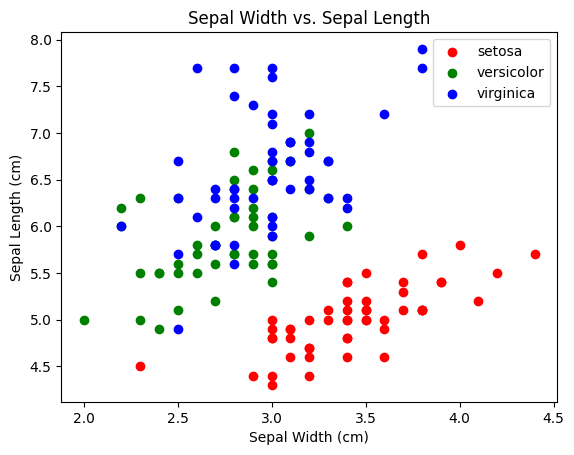

In [2]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2] 
y = iris.target      

# Q4.1
# plot
for target, color, label in zip(np.unique(y), ['r', 'g', 'b'], iris.target_names):
    plt.scatter(X[y == target, 1], X[y == target, 0], c=color, label=label)
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('Sepal Width vs. Sepal Length')
plt.legend()
plt.show()

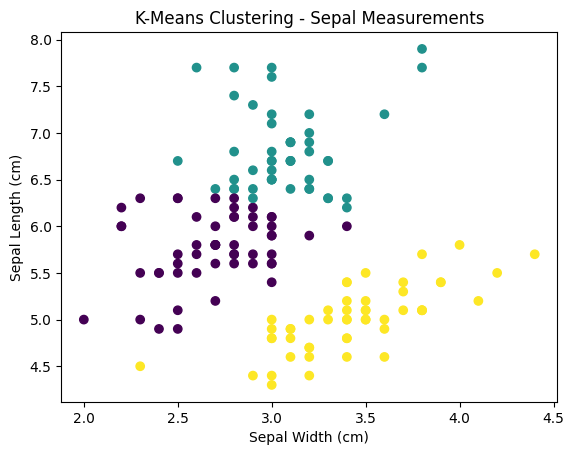

Silhouette Index:  0.4450525692083638


'\nAccording to the class label plot (P1), we can see some green dots and blue dots \nare mixed together, or overlapping. After we do cluster assignment (P2), we kinda\nof split the overlapping situation better. The samples are now clearly separated \ninto 3 different sectors. \n\nSilhouette index is a value between -1 and 1. Negative values generally indicate that a \nsample has been assigned to the wrong cluster. Values near 0 indicate overlapping \nclusters. 0.445 means moderate clustering structure. So yes, as we can see from P1, we \ncan tell there are some mixture/overlapping in vertisicolor and virginica.\n\n'

In [5]:
#Q4.2a
from sklearn.cluster import KMeans

# 3 clusters, and random_state  = 0
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

plt.scatter(X[:, 1], X[:, 0], c=kmeans_labels, cmap='viridis')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('K-Means Clustering - Sepal Measurements')
plt.show()

#Q4.2b
from sklearn.metrics import silhouette_score

silhouette_index = silhouette_score(X, kmeans_labels)
print("Silhouette Index: ",silhouette_index)


# Q4.2c
'''
According to the class label plot (P1), we can see some green dots and blue dots 
are mixed together, or overlapping. After we do cluster assignment (P2), we kinda
of split the overlapping situation better. The samples are now clearly separated 
into 3 different sectors. 

Silhouette index is a value between -1 and 1. Negative values generally indicate that a 
sample has been assigned to the wrong cluster. Values near 0 indicate overlapping 
clusters. 0.445 means moderate clustering structure. So yes, as we can see from P1, we 
can tell there are some mixture/overlapping in vertisicolor and virginica.

'''

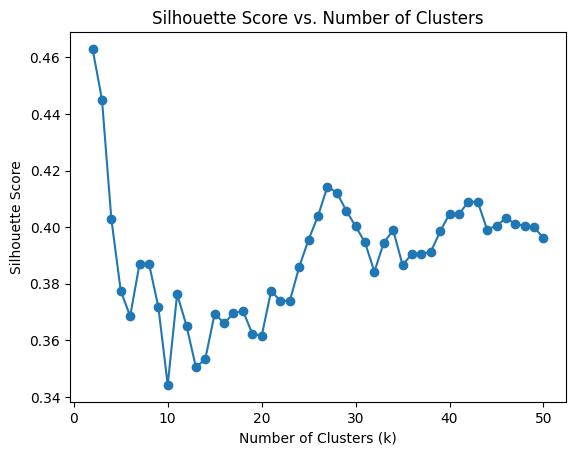

In [41]:
# Q4.3
iris = load_iris()
X = iris.data[:, :2] 
y = iris.target 

silhouette_score_set = []

for k in range(2,51):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans_labels = kmeans.fit_predict(X)


    silhouette_index = silhouette_score(X, kmeans_labels)
    silhouette_score_set.append((k,float(silhouette_index)))

# print(silhouette_score_set)

k_values = [item[0] for item in silhouette_score_set]
silhouette_scores = [item[1] for item in silhouette_score_set]

# Plot the silhouette scores against k values
# plt.figure(figsize=(12, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
# plt.xticks(range(2, 51, 2))  # Set x-ticks from 2 to 50 with step size of 2
# plt.grid(True)
plt.show()


'''
Yes, K = 2 is better than K = 3. Because from the P1, based sepal measurements alone,
the data naturally forms two clusters, which is why we saw some overlapping in vertisicolor and virginica
'''

/Users/kelvin/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


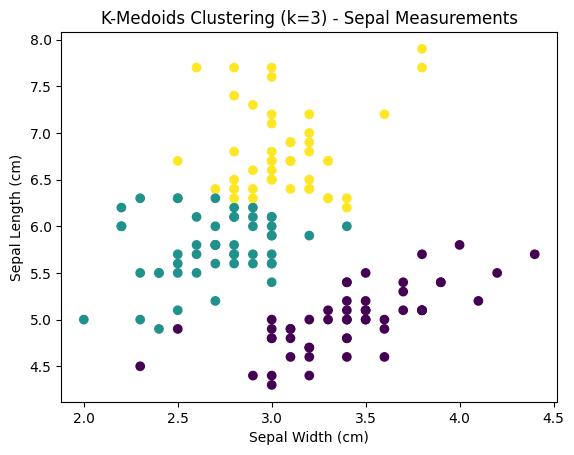

'\nK-mediod looks the same as k-means.\n'

In [10]:
# Q4.4

from sklearn_extra.cluster import KMedoids

# Apply K-Medoids clustering
kmedoids = KMedoids(n_clusters=3, random_state=0)
kmedoids_labels = kmedoids.fit_predict(X)

# Plot the clustering results
# plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], X[:, 0], c=kmedoids_labels)
plt.ylabel('Sepal Length (cm)')
plt.xlabel('Sepal Width (cm)')
plt.title('K-Medoids Clustering (k=3) - Sepal Measurements')
plt.show()

'''
K-mediod looks almost the same as k-means.
KMedoids is related to the KMeans algorithm. While KMeans 
tries to minimize the within cluster sum-of-squares, KMedoids
tries to minimize the sum of distances between each point and the medoid of its cluster. 
'''